In [3]:
import pandas as pd
import numpy as np# x = np.linspace(-4,4,100)
# pdf = norm_rv.pdf(x)
# plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
# plt.legend()
# plt.ylabel('$f(x)$')
# plt.xlabel('$x$')# x = np.linspace(-4,4,100)
# pdf = norm_rv.pdf(x)
# plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
# plt.legend()
# plt.ylabel('$f(x)$')
# plt.xlabel('$x$')
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [4]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [5]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({4: 26, 5: 20, 2: 17, 6: 17, 3: 10, 1: 10})
Вероятности выпадений каждой из сторон:
{3: 0.1, 2: 0.17, 6: 0.17, 4: 0.26, 1: 0.1, 5: 0.2}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [7]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([-1.13385827e+00,  1.88144751e-01, -3.22591684e-01, -1.11265183e-01,
       -7.33296998e-02, -1.31709633e-01, -1.03888659e+00,  3.81691695e-01,
       -1.89666521e-01, -1.64693195e+00,  2.10009884e+00,  2.38199526e-01,
       -2.67423357e+00,  9.84902161e-02,  8.01316904e-01, -1.05967691e+00,
        4.23318391e-01, -4.29688182e-01, -5.75805695e-02, -1.67835198e+00,
        9.67008453e-01, -1.22275198e+00, -2.34707993e-01,  1.34083777e-01,
        1.41240789e+00,  3.56971418e-01, -1.40678624e+00,  3.38635667e-01,
       -8.60136636e-01, -2.07814368e+00, -7.88676528e-01, -8.74342200e-01,
        7.73950532e-01,  6.92267601e-01, -1.29108679e+00, -1.75993315e+00,
        1.54625767e-01, -8.56722221e-01,  9.85147981e-01,  2.17779556e+00,
       -5.83104604e-03,  9.24163448e-01, -3.25368025e-01, -1.25647600e+00,
       -1.66573461e+00,  9.99122923e-02, -1.41253296e+00,  7.86637243e-01,
       -4.46002570e-01, -1.18156799e+00, -3.03191734e-01,  1.17986860e+00,
       -2.04313105e-01,  

Эмпирическая функция распределения для полученной выборки:

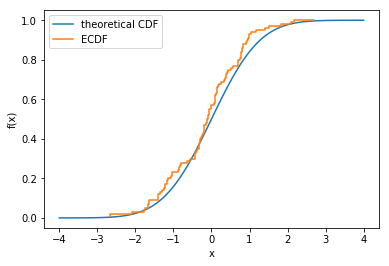

In [26]:

x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(loc='best')

Гистограмма выборки:

Text(0.5, 0, '$x$')

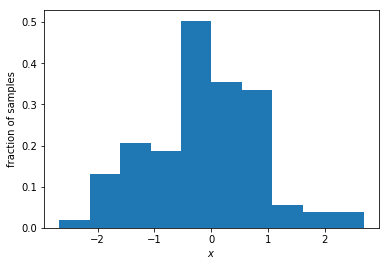

In [36]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5, 0, '$x$')

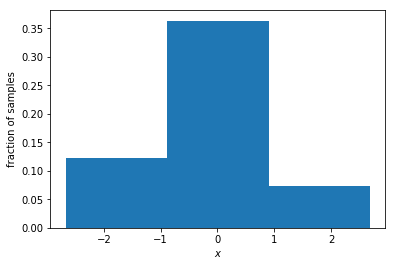

In [37]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

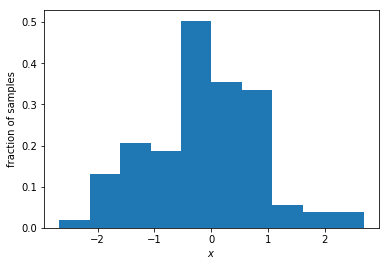

In [40]:
plt.hist(sample, bins=10, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

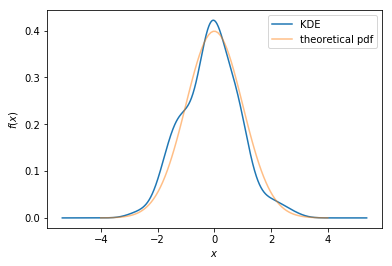

In [48]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')